In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from categorical import one_hot_encode_categorical
from feature_nlp import nlp
from feature_numerical import process_numerical_columns
from location_preprocessing import get_locations_features
from feature_date import cyclical_encode_dates

In [3]:
df = pd.read_csv("Airbnb_Data.csv")
print(df.shape)
df.head()

(74111, 29)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [41]:
df_categorical = one_hot_encode_categorical(df)
print(df_categorical.shape)
df_categorical.head()

/Users/ChanWingYiu/Documents/Data Science in the Wild/Project/dsw-project/categorical.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_group].fillna("Unknown", inplace=True)


(74111, 83)


,one_hot_encoder__property_type_Apartment,one_hot_encoder__property_type_Bed & Breakfast,one_hot_encoder__property_type_Boat,one_hot_encoder__property_type_Boutique hotel,one_hot_encoder__property_type_Bungalow,one_hot_encoder__property_type_Cabin,one_hot_encoder__property_type_Camper/RV,one_hot_encoder__property_type_Casa particular,one_hot_encoder__property_type_Castle,one_hot_encoder__property_type_Cave,...,remainder__number_of_reviews,remainder__review_scores_rating,remainder__thumbnail_url,remainder__zipcode,remainder__bedrooms,remainder__beds,remainder__combined_description,remainder__keywords_combined,remainder__description_polarity,remainder__description_subjectivity
0,True,False,False,False,False,False,False,False,False,False,...,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,"Beautiful brownstone 1-bedroom Beautiful, sunl...","brownstone, brooklyn, beautiful, stunning, bridge",0.75,0.9375
1,True,False,False,False,False,False,False,False,False,False,...,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,Superb 3BR Apt Located Near Times Square Enjoy...,"times, place, square, centrally, located",0.2975,0.512083
2,True,False,False,False,False,False,False,False,False,False,...,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,The Garden Oasis The Oasis comes complete with...,"unit, backyard, lighting, total, entire",0.274085,0.512857
3,False,False,False,False,False,False,False,False,False,False,...,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,Beautiful Flat in the Heart of SF! This light-...,"haight, super, away, trendy, street",0.301186,0.553205
4,True,False,False,False,False,False,False,False,False,False,...,4,40.0,NaN,20009,0.0,1.0,"Great studio in midtown DC Cool, cozy, and com...","tons, metro, diverse, different, columbia",0.239881,0.495833


In [5]:
df_nlp = nlp(df)
print(df_nlp.shape)
df_nlp.head()

(74111, 30)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,keywords_combined,description_polarity,description_subjectivity
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,"brownstone, brooklyn, beautiful, stunning, bridge",0.750000,0.937500
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,"times, place, square, centrally, located",0.297500,0.512083
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,"unit, backyard, lighting, total, entire",0.274085,0.512857
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,"haight, super, away, trendy, street",0.301186,0.553205
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,"tons, metro, diverse, different, columbia",0.239881,0.495833


In [6]:
df_numerical = process_numerical_columns(df)
print(df_numerical.shape)
df_numerical.head()

mode of bathroom:  1.0
(74111, 6)


,accommodates,beds,bedrooms,bathrooms,host_response_rate,normalized_rating
0,3,1,1,1.0,94.351967,0.000001
1,7,3,3,1.0,100.000000,0.000004
2,5,3,1,1.0,100.000000,0.000006
3,4,2,2,1.0,94.351967,0.000017
4,2,1,0,1.0,100.000000,0.000001


In [7]:
df_locations, locations_scaler =  get_locations_features(df)
print(df_locations.shape)
df_locations.head()

(74111, 627)


/Users/ChanWingYiu/Documents/Data Science in the Wild/Project/dsw-project/location_preprocessing.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['latitude', 'longitude']] = scaler.fit_transform(


,latitude,longitude,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,neighbourhood_16th Street Heights,neighbourhood_Adams Morgan,...,neighbourhood_Winnetka,neighbourhood_Winthrop,neighbourhood_Woodhaven,neighbourhood_Woodland,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville
0,0.812859,0.941650,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.820547,0.941700,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.825187,0.942579,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.489762,0.001550,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.617213,0.882593,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df_datetime = cyclical_encode_dates(df)
print(df_datetime.shape)
df_datetime.head()

Missing rows in first_review: 15864
Missing rows in host_since: 188
Missing rows in last_review: 15827
(74111, 3)


/Users/ChanWingYiu/Documents/Data Science in the Wild/Project/dsw-project/feature_date.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ChanWingYiu/Documents/Data Science in the Wild/Project/dsw-project/feature_date.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ChanWingYiu/Documents/Data Science in the Wild/Project/dsw-project/feature_date.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,first_review_days_since,host_since_days_since,last_review_days_since
0,2857.000000,4402.0,2827.000000
1,2444.000000,2491.0,2395.000000
2,2541.000000,2728.0,2404.000000
3,3012.658437,3283.0,2587.189366
4,3260.000000,3332.0,2639.000000


In [56]:
all_data_df = pd.concat([
    # df_categorical, 
    df_nlp[['description_polarity', 'description_subjectivity']],
    df_numerical[['accommodates', 'beds', 'bedrooms', 'bathrooms', 'host_response_rate', 'normalized_rating']],
    df_locations[['latitude', 'longitude']],
    df_datetime
                         
                         ], axis=1)
print(all_data_df.shape)
all_data_df.head()

(74111, 13)


,description_polarity,description_subjectivity,accommodates,beds,bedrooms,bathrooms,host_response_rate,normalized_rating,latitude,longitude,first_review_days_since,host_since_days_since,last_review_days_since
0,0.750000,0.937500,3,1,1,1.0,94.351967,0.000001,0.812859,0.941650,2857.000000,4402.0,2827.000000
1,0.297500,0.512083,7,3,3,1.0,100.000000,0.000004,0.820547,0.941700,2444.000000,2491.0,2395.000000
2,0.274085,0.512857,5,3,1,1.0,100.000000,0.000006,0.825187,0.942579,2541.000000,2728.0,2404.000000
3,0.301186,0.553205,4,2,2,1.0,94.351967,0.000017,0.489762,0.001550,3012.658437,3283.0,2587.189366
4,0.239881,0.495833,2,1,0,1.0,100.000000,0.000001,0.617213,0.882593,3260.000000,3332.0,2639.000000


In [57]:
print(all_data_df.dtypes)

description_polarity        float64
description_subjectivity    float64
accommodates                  int64
beds                          int64
bedrooms                      int64
bathrooms                   float64
host_response_rate          float64
normalized_rating           float64
latitude                    float64
longitude                   float64
first_review_days_since     float64
host_since_days_since       float64
last_review_days_since      float64
dtype: object


In [58]:
all_data_df.columns[all_data_df.isna().any()].tolist()

[]

In [59]:
all_data_df.shape

(74111, 13)

In [60]:
X = all_data_df.copy()
y = df['log_price'].copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [61]:
model = LinearRegression()

In [62]:
model.fit(X_train, y_train)

LinearRegression()

In [63]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

In [64]:
# The coefficients
# print('Coefficients:', model.coef_)

# Mean squared error
print('Mean squared error:', mean_squared_error(y_test, y_pred))

# Coefficient of determination (1 is perfect prediction)
print('Coefficient of determination:', r2_score(y_test, y_pred))

Mean squared error: 0.3293528489891206
Coefficient of determination: 0.35889381881409177


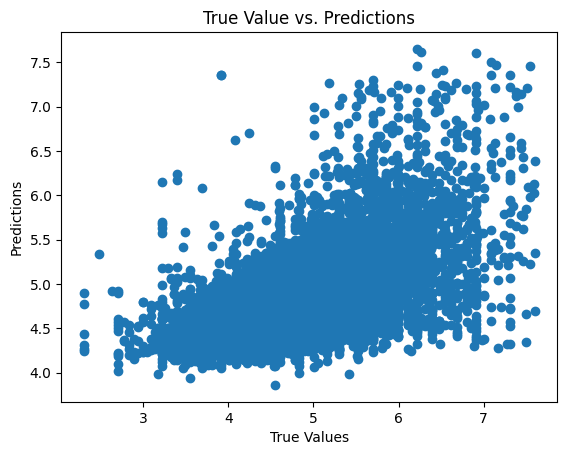

In [65]:
# Plotting for visualization
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Value vs. Predictions')
plt.show()